# RONALDO RAFAEL ARIAS PARADA-1151674

# Claustering

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [11]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [61]:
data.tail(n=5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0
437,2,3,14531,15488,30243,437,14841,1867,2
438,1,3,10290,1981,2232,1038,168,2125,0
439,1,3,2787,1698,2510,65,477,52,0


In [12]:
data.shape

(440, 8)

In [13]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [14]:
data.info

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

In [15]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

DataFrame datos


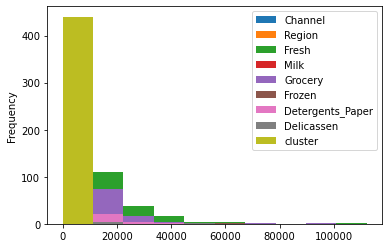

In [84]:
#Data original
data.plot(kind = 'hist')
print("DataFrame datos")

a)	Elimine las columnas channel y región.

In [72]:
dataN = data.drop(['Channel','Region'], axis=1)
dataN

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,0


b)	Revise si hay nulos

In [74]:
#VERIFICAR SI HAY NULOS.
dataN.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
cluster             0
dtype: int64

c)	Grafique los histogramas de las columnas.

DataFrame datos


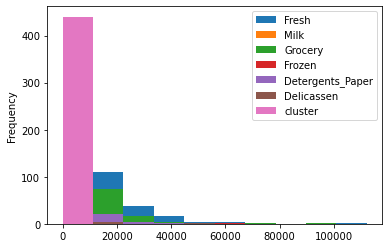

In [75]:
dataN.plot(kind = 'hist')
print("DataFrame datos")

In [76]:
dataN.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,-0.091060
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.317236
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.400619
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,-0.079347
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.417596
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.018485
cluster,-0.091060,0.317236,0.400619,-0.079347,0.417596,0.018485,1.000000


<AxesSubplot:>

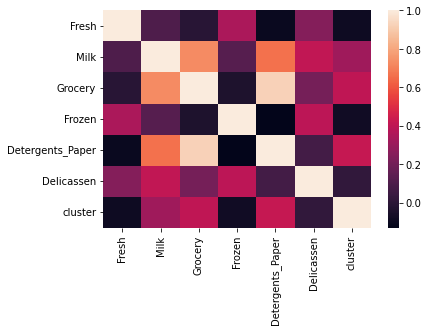

In [77]:
sns.heatmap(dataN.corr())

d)	Determine la cantidad optima de clúster con el dendrograma.

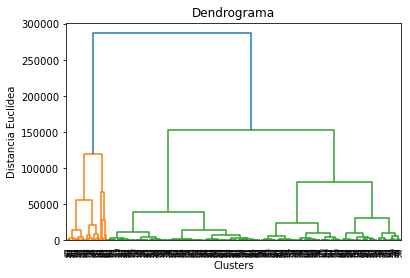

In [79]:
X = dataN.iloc[:, [0, 6]].values
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrograma")
plt.xlabel("Clusters")
plt.ylabel("Distancia Euclídea")
plt.show()

e)	Determine la cantidad de clúster con el método del codo.

In [80]:
# encontranddo el número óptimo de grupos.
#con el  siguiente metodo del codo

clusters = range(1, 20)
sse=[]
for cluster in clusters:
    model = KMeans(n_clusters=cluster,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=None,
               algorithm='auto')

    model.fit(scaled_df)
    sse.append(model.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs

Text(0, 0.5, 'Inercia')

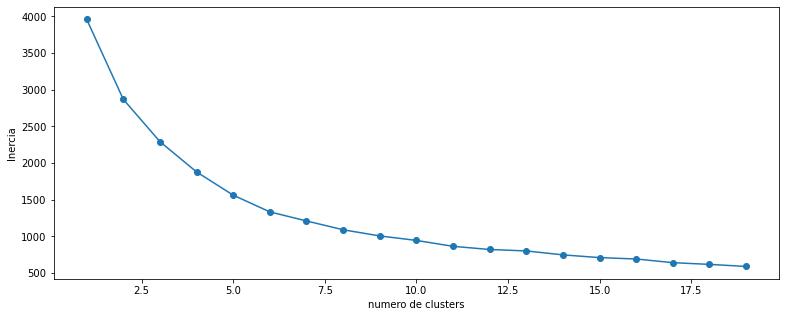

In [41]:
#Graficando el resultado
sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'Inercia'])
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(sse_df['cluster'], sse_df['Inercia'], marker='o')
ax.set_xlabel('numero de clusters')
ax.set_ylabel('Inercia')

f)	Escale los datos

In [81]:
#Escalado de los datos
scaler = StandardScaler()
scaled_df = scaler.fit_transform(dataN)

pd.DataFrame(scaled_df).describe()

,0,1,2,3,4,5,6
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17,1.428151e-16
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01,-9.854821e-01
25%,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01,-9.854821e-01
50%,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01,5.440139e-01
75%,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01,5.440139e-01
max,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01,2.073510e+00


In [82]:
# Ajustar el clustetring jerárquico a nuestro conjunto de datos
ch = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
y_ch = ch.fit_predict(X)



In [83]:
y_ch

array([4, 2, 2, 4, 3, 4, 4, 4, 2, 2, 2, 4, 1, 3, 3, 4, 2, 2, 3, 4, 3, 2,
       1, 1, 3, 3, 4, 4, 2, 1, 3, 2, 3, 1, 2, 2, 1, 3, 2, 0, 3, 3, 4, 2,
       4, 2, 2, 1, 4, 2, 2, 2, 1, 2, 1, 2, 2, 2, 4, 2, 4, 1, 4, 4, 2, 2,
       2, 3, 2, 4, 3, 3, 2, 3, 4, 3, 2, 4, 4, 2, 2, 2, 4, 3, 4, 3, 3, 1,
       4, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 0, 4, 3, 2, 4, 2, 2,
       4, 4, 3, 4, 3, 4, 4, 2, 3, 4, 3, 2, 4, 4, 1, 0, 3, 3, 2, 1, 2, 2,
       3, 4, 2, 2, 2, 2, 4, 2, 3, 1, 1, 4, 3, 3, 4, 4, 2, 1, 3, 2, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 4, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 4, 4, 2, 4, 0, 2, 1, 2, 4, 2, 2, 4, 2, 3, 4, 2, 2, 2, 3, 1, 2,
       4, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 3, 2, 2,
       3, 2, 2, 2, 2, 4, 3, 2, 2, 4, 4, 2, 1, 2, 3, 2, 4, 3, 2, 1, 3, 3,
       3, 4, 2, 2, 4, 4, 3, 4, 2, 2, 2, 1, 4, 1, 4, 4, 0, 0, 4, 4, 3, 2,
       2, 2, 2, 3, 4, 3, 2, 2, 2, 1, 2, 2, 1, 4, 4, 3, 2, 4, 1, 1, 0, 1,
       2, 3, 3, 1, 2, 2, 2, 2, 3, 4, 3, 4, 2, 2, 3,

i)	Construya otro modelo utilizando k-means

In [58]:
#Aplicando el modelo Kmeans modelo de claustering inicial
model = KMeans(n_clusters=3,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=None,
               algorithm='auto')

model.fit(scaled_df)
model.inertia_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


2291.6543994526596

#   modelo final de claustering

In [44]:
#Se eligen K=5 y ajustaremos el modelo.
model = KMeans(n_clusters=5,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=-1,
               algorithm='auto')

In [45]:
model.fit(scaled_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1, precompute_distances='auto', random_state=42)

In [46]:
print('Inercia: ', model.inertia_)
print('\nCentroides: \n', model.cluster_centers_)

pred = model.predict(scaled_df)
data['cluster'] = pred
print('\nCantidad en cada cluster: \n', data['cluster'].value_counts())

Inercia:  1561.6359842835584

Centroides: 
 [[-6.80111616e-01  5.90668285e-01  1.12663617e-01 -3.55978165e-01
  -4.42978026e-01  7.32433363e-02 -4.43738312e-01 -9.14933607e-02
   2.58818452e-02]
 [-1.55559907e-01  2.67416985e-01  3.16804122e+00  3.51326433e+00
   1.11031138e+00  5.51716255e+00 -3.83193146e-02  6.43664422e+00
   1.60755017e+00]
 [ 1.44865163e+00  1.66562579e-01 -3.26341681e-01  4.22850268e-01
   6.59619766e-01 -3.57310160e-01  6.86224579e-01  4.36563167e-03
  -1.23945281e+00]
 [-5.72772431e-01 -1.59749436e+00  1.45371704e-02 -3.44758082e-01
  -4.02466315e-01  7.96677044e-02 -4.24411072e-01 -1.33102511e-01
   1.29121650e+00]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01
   2.55655116e+00]]

Cantidad en cada cluster: 
 0    210
2    125
3     91
4     10
1      4
Name: cluster, dtype: int64


# Redes Neuronales Artificiales